In [1]:
import csv
import mysql.connector
import pandas as pd

# Połączenie z MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='your_username',
    password='your_password',
    database='your_database'
)
cursor = conn.cursor()

# Odczyt pliku CSV w partiach
with open('C:/ProgramData/MySQL/MySQL Server 9.1/Uploads/item_properties_part1.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Pomija nagłówek
    batch_size = 10000  # Liczba wierszy na partię
    batch = []

    for row in reader:
        batch.append(row)

        if len(batch) == batch_size:
            insert_query = """INSERT INTO item_properties (timestamp, itemid, value, property, additional_information)
                              VALUES (%s, %s, %s, IF(%s REGEXP '^[0-9]+$', CAST(%s AS UNSIGNED), NULL), 
                              IF(%s REGEXP '^[0-9]+$', NULL, %s))"""
            cursor.executemany(insert_query, [(r[0], r[1], r[2], r[3], r[3], r[3], r[3]) for r in batch])
            conn.commit()
            batch = []

    if batch:
        cursor.executemany(insert_query, [(r[0], r[1], r[2], r[3], r[3], r[3], r[3]) for r in batch])
        conn.commit()

cursor.close()
conn.close()



ProgrammingError: 1045 (28000): Access denied for user 'your_username'@'localhost' (using password: YES)

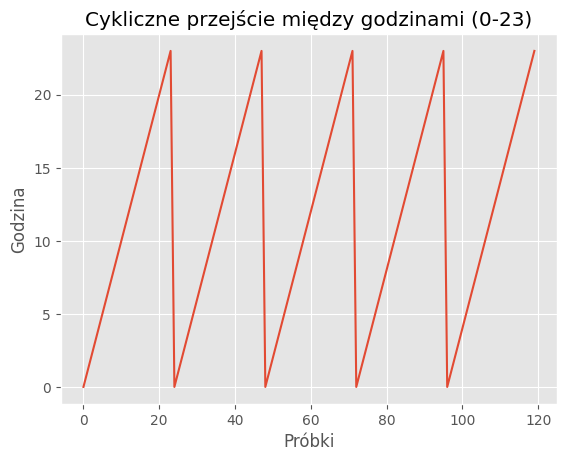

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry cyklicznego wykresu godzin
period = 24  # cykl od 0 do 23 godzin
length = 120  # liczba punktów, czyli liczba godzin do pokazania

# Generowanie danych dla godzin
x = np.arange(length)
y = x % period  # Modulo powoduje, że wartości powtarzają się od 0 do 23

# Rysowanie wykresu
plt.style.use('ggplot')  # Lub inny styl z listy dostępnych
plt.plot(x, y)
plt.xlabel('Próbki')
plt.ylabel('Godzina')
plt.title('Cykliczne przejście między godzinami (0-23)')

plt.savefig('wykres_zmiennej_cyklicznej.png')  # Możesz zmienić nazwę na coś bardziej opisowego
plt.show()


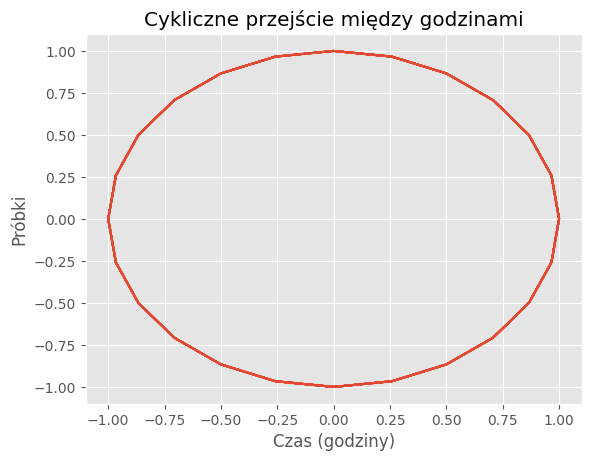

In [4]:
y_sin = np.sin((2 * np.pi * y)/24)
y_cos = np.cos((2 * np.pi * y)/24)

plt.style.use('ggplot')  # Lub inny styl z listy dostępnych
plt.plot(y_sin, y_cos)
plt.xlabel('Czas (godziny)')
plt.ylabel('Próbki')
plt.title('Cykliczne przejście między godzinami')

plt.savefig('cykliczne_przejście_po_transformacji.png')  # Możesz zmienić nazwę na coś bardziej opisowego
plt.show()

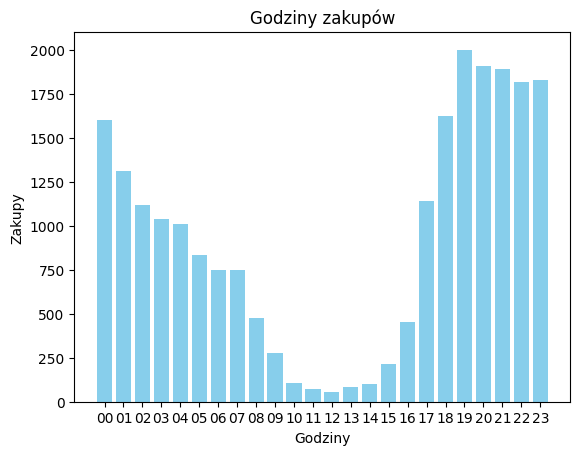

In [3]:
import matplotlib.pyplot as plt

# Dane
x = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']   # Kategorie na osi X
y = [1600, 1311, 1119, 1037, 1012, 836, 747, 747, 477, 278, 106, 70, 57, 84, 103, 215, 455, 1138, 1621, 2000, 1907, 1891, 1817, 1829]       # Wysokości słupków na osi Y

# Tworzenie wykresu słupkowego
plt.bar(x, y, color='skyblue')

# Opisy osi i tytuł
plt.xlabel("Godziny")
plt.ylabel("Zakupy")
plt.title("Godziny zakupów")

plt.savefig('Najczęstsze_godziny_zakupów.png') 
# Wyświetlenie wykresu
plt.show()




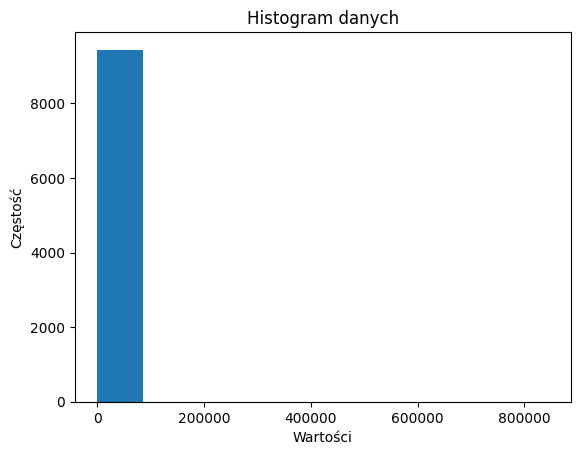

In [12]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

username = 'root'
password = 'haslo123'
host = '127.0.0.1'
port = '3306'
database = 'browsing_before_purchase'
batch_size = 1

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

query = ("select * from (SELECT unique_id, COUNT(*) AS count FROM browsing_before_purchase.separated_words GROUP BY unique_id order by count) as occurrences where count > 100;")

df = pd.read_sql_query(query, engine)

df['count'].plot.hist(bins=10)
plt.xlabel('Wartości')
plt.ylabel('Częstość')
plt.title('Histogram danych')
plt.show()



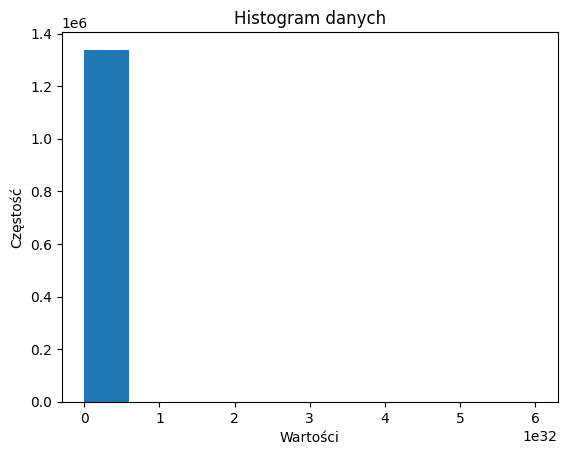

In [13]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

username = 'root'
password = 'haslo123'
host = '127.0.0.1'
port = '3306'
database = 'browsing_before_purchase'
batch_size = 1

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

query = ("select * from separated_number;")

df = pd.read_sql_query(query, engine)

df['number_value'].plot.hist(bins=10)
plt.xlabel('Wartości')
plt.ylabel('Częstość')
plt.title('Histogram danych')
plt.show()

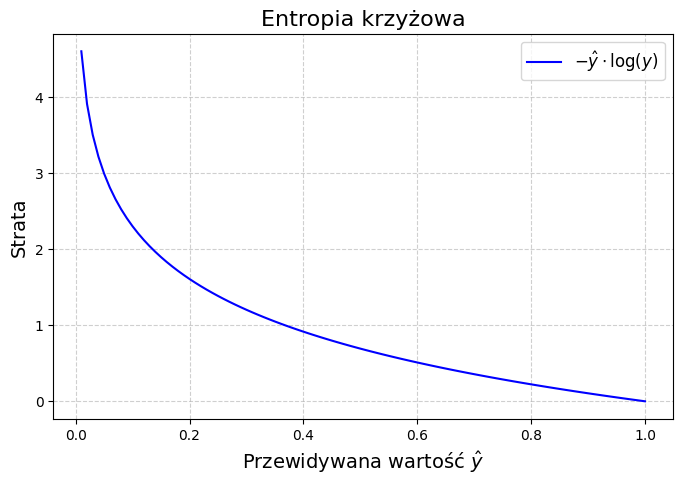

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Zakres wartości przewidywanych (od 0 do 1)
y_hat = np.linspace(0.01, 1, 100)  # Unikamy 0, ponieważ log(0) jest niezdefiniowane

# Rzeczywista wartość y (przykład dla y = 1)
y_true = 1

# Funkcja strat cross-entropy
loss = -y_true * np.log(y_hat)

# Tworzenie wykresu
plt.figure(figsize=(8, 5))
plt.plot(y_hat, loss, label=r"$-\hat{y} \cdot \log(y)$", color='blue')
plt.title("Entropia krzyżowa", fontsize=16)
plt.xlabel(r"Przewidywana wartość $\hat{y}$", fontsize=14)
plt.ylabel("Strata", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.savefig('funckja_starty_entropii_krzyżowej.png') 
plt.show()


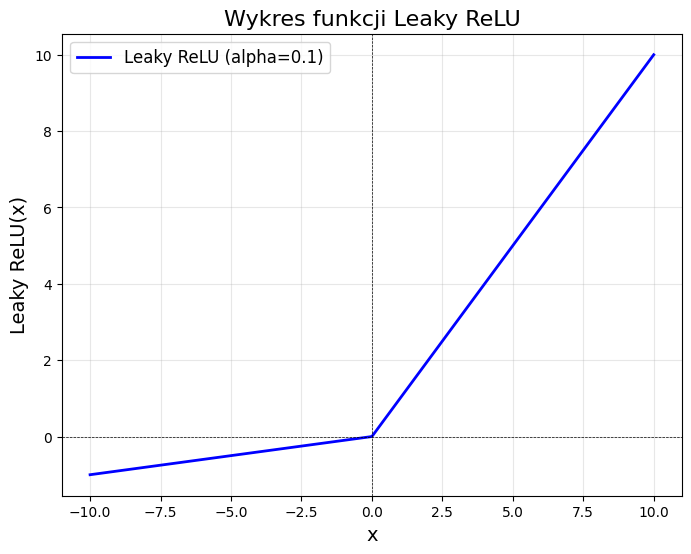

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.1):
    """Przecięta funkcja ReLU z nachyleniem alpha dla x < 0."""
    return np.where(x > 0, x, alpha * x)

# Generowanie danych
x = np.linspace(-10, 10, 500)  # Przedział wartości od -10 do 10
y = leaky_relu(x)

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'Leaky ReLU (alpha=0.1)', color='blue', linewidth=2)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Linia pozioma y=0
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Linia pionowa x=0

# Dodanie opisów osi i tytułu
plt.title('Wykres funkcji Leaky ReLU', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Leaky ReLU(x)', fontsize=14)

# Dodanie legendy
plt.legend(fontsize=12)

# Wyświetlenie siatki
plt.grid(alpha=0.3)

plt.savefig('przeciakjąca_funckja_ReLU.png') 
# Wyświetlenie wykresu
plt.show()


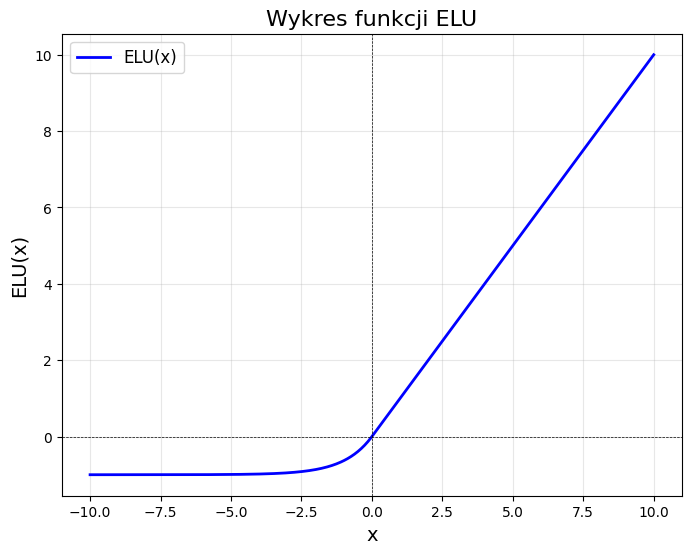

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def elu(x, alpha=1.0):
    """Funkcja aktywacji ELU."""
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Generowanie danych
x = np.linspace(-10, 10, 500)  # Przedział wartości od -10 do 10
y = elu(x)

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ELU(x)', color='blue', linewidth=2)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Linia pozioma y=0
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Linia pionowa x=0

# Dodanie opisów osi i tytułu
plt.title('Wykres funkcji ELU', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('ELU(x)', fontsize=14)

# Dodanie legendy
plt.legend(fontsize=12)

# Wyświetlenie siatki
plt.grid(alpha=0.3)

plt.savefig('przeciakjąca_funckja_ELU.png') 
# Wyświetlenie wykresu
plt.show()
